# Last Activity MIA05

Integrantes:

Juan Carlos Muñoz Esquivel.
María Delina Culebro Farrera.
Aline Hernandez Garcia.
Miguel Ángel Tamer Meyer.



# CNN


In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#Lee transforms como un tensor
transform = transforms.ToTensor()

In [42]:
#Se leen y bajan los datos de entrenamiento en la computadora
train_data = datasets.MNIST(root='.Data',train=True,download=True,transform=transform)

In [43]:
#Se leen y bajan los datos de prueba en la computadora
test_data = datasets.MNIST(root='./Data',train=False,download=True,transform=transform)

In [44]:
#Descripcíon de los datos de entrenamiento
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: .Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [45]:
#descrpcíon de los datos de entrenamiento
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [46]:
#Se trabaja con un tamaño de lote esto de pende de la computadora y del modelo
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [47]:
#Se define el modelo convolucional 1 Canal de colores es gris, hacer 6 filtros (Canales de salidas), 3 por 3 Núcleos (Que tan grande debería ser el filtro o la imagen de nucleo), paso de 1
conv1 = nn.Conv2d(1,6,3,1) #Tiene 6 filtros ---> agrupación ---> a red cnn conv2

#6 entradas de filtros de Conv1, 16 filters son experimentales, # 3 por 3, paso de 1
conv2 = nn.Conv2d(6,16,3,1)

In [48]:
#esto nos permite solo agarrar el primer lote de datos
for i,(X_train,y_train) in enumerate(train_data):
    break

In [49]:
X_train.shape # convertir a 4 dimensiones por agrupacion de 1 imagen

torch.Size([1, 28, 28])

In [50]:
x = X_train.view(1,1,28,28)
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [51]:
#Lo pasamos en la primera capa de convolución
x=F.relu(conv1(x)) # 1 imagen, 6 filtros, 26 porque perdimos información de los extremos
x.shape

torch.Size([1, 6, 26, 26])

In [52]:
#Lo pasamos por la capa de agrupación
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 6, 13, 13])

In [53]:
#Lo pasamos por la segunda capa de convolución
x = F.relu(conv2(x))
x.shape

torch.Size([1, 16, 11, 11])

In [54]:
#Lo pasamos por la segunda capa de agrupación
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 16, 5, 5])

In [55]:
#(((28-2)/2)-2)/2 = 5.5 = 5
#-1 significa que asume lo que sea del tamaño del lote es que guade la primera dimensión

x.view(-1,16*5*5).shape

torch.Size([1, 400])

Model y entrenamiento

In [56]:
#Ampliar la clase de módulo base

class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        #Configura las capas convolucionales
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        #Configura las capas completamente conectadas
        #El tamaño de entrada de (5x5x16) está determinado por el efecto de nuestros núcleos en el tamaño de la imagen de entrada.
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    #Definir el método de avance    
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X,dim=1)

In [57]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [58]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [59]:
# total 60074
# Defini
criterion = nn.CrossEntropyLoss()
optimizer =  torch.optim.Adam(model.parameters(),lr=0.001)

In [60]:
import time
start_time = time.time()

#Variable 
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []
#Bucle de epocas
for i in range(epochs):
    
    trn_corr=0
    tst_corr=0
    #Train
    
    #Corrienedo los lotes de entrenamiento
    for b,(X_train, y_train) in enumerate(train_loader):
        b+=1
        
        #aplicando modelo
        y_pred = model(X_train) #no aplanada
        loss = criterion(y_pred,y_train)
        
        #totald de número de prediccciones correctastotal 
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum() #Verdadero 1 / falso 0 de la funcion sum()
        trn_corr += batch_corr
        
        #Actualizando parámetros
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #Imprimiendo resultados interinos
        if b%600 ==0:
            print(f"EPOCH: {i} BATCH: {b} LOSS: {loss.item()}")
    
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    #Corriendo los lotes de pruebas
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            
            #Aplicando modelo
            y_val = model(X_test)
            
            #Total de número de predicciones correctas
            predicted =  torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)






current_time = time.time()
total = current_time - start_time
print(f"Training took {total/60} minutes")

EPOCH: 0 BATCH: 600 LOSS: 0.04255066066980362
EPOCH: 0 BATCH: 1200 LOSS: 0.07941775768995285
EPOCH: 0 BATCH: 1800 LOSS: 0.31659573316574097
EPOCH: 0 BATCH: 2400 LOSS: 0.017571672797203064
EPOCH: 0 BATCH: 3000 LOSS: 0.006613238714635372
EPOCH: 0 BATCH: 3600 LOSS: 0.0013382696779444814
EPOCH: 0 BATCH: 4200 LOSS: 0.5070301294326782
EPOCH: 0 BATCH: 4800 LOSS: 0.030819613486528397
EPOCH: 0 BATCH: 5400 LOSS: 0.011751520447432995
EPOCH: 0 BATCH: 6000 LOSS: 0.05140992999076843
EPOCH: 1 BATCH: 600 LOSS: 0.04187324270606041
EPOCH: 1 BATCH: 1200 LOSS: 0.05362094193696976
EPOCH: 1 BATCH: 1800 LOSS: 0.004769772756844759
EPOCH: 1 BATCH: 2400 LOSS: 0.03462228924036026
EPOCH: 1 BATCH: 3000 LOSS: 0.3709203004837036
EPOCH: 1 BATCH: 3600 LOSS: 0.0003186531539540738
EPOCH: 1 BATCH: 4200 LOSS: 0.0006297794170677662
EPOCH: 1 BATCH: 4800 LOSS: 0.000635050586424768
EPOCH: 1 BATCH: 5400 LOSS: 0.0006261309026740491
EPOCH: 1 BATCH: 6000 LOSS: 0.009330169297754765
EPOCH: 2 BATCH: 600 LOSS: 0.001098857494071126
EP

Evaluación del modelo


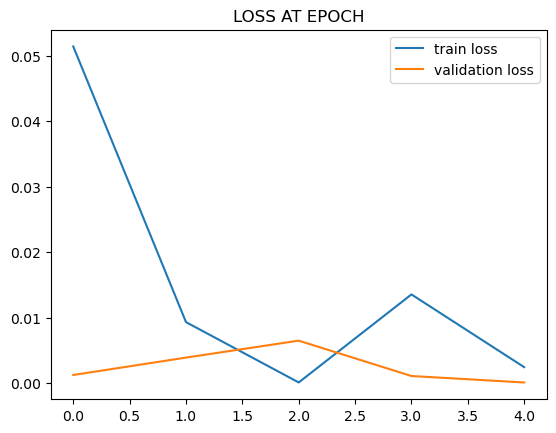

In [61]:
with torch.no_grad():
    plt.plot(train_losses,label='train loss')
    plt.plot(test_losses,label='validation loss')
    plt.title('LOSS AT EPOCH')
    plt.legend()

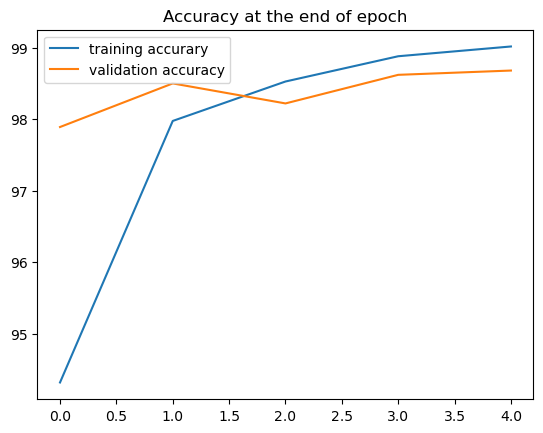

In [62]:
plt.plot([t/600 for t in train_correct], label='training accurary')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of epoch')
plt.legend();

Evaluando los Datos

In [63]:
#Extrayendo todo los datos, sin lotes
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [64]:
with torch.no_grad():
    correct = 0
    for X_test,y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        

In [65]:
100*correct.item()/len(test_data)

98.68

Mostrando la matriz de confusión

In [66]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

[[   0    1    2    3    4    5    6    7    8    9]]



In [67]:
cm = confusion_matrix(predicted.view(-1),y_test.view(-1))
cm

array([[ 973,    0,    1,    0,    0,    2,    2,    0,    6,    0],
       [   0, 1134,    0,    0,    1,    0,    5,    8,    0,    0],
       [   2,    0, 1028,    0,    1,    0,    1,    9,    4,    0],
       [   0,    1,    0, 1009,    0,   19,    0,    0,    2,    1],
       [   0,    0,    1,    0,  977,    0,    1,    0,    0,   14],
       [   0,    0,    0,    1,    0,  859,    2,    0,    0,    3],
       [   4,    0,    0,    0,    1,    2,  946,    0,    1,    0],
       [   1,    0,    2,    0,    0,    1,    0, 1008,    2,    6],
       [   0,    0,    0,    0,    0,    2,    1,    1,  957,    8],
       [   0,    0,    0,    0,    2,    7,    0,    2,    2,  977]],
      dtype=int64)

<Axes: >

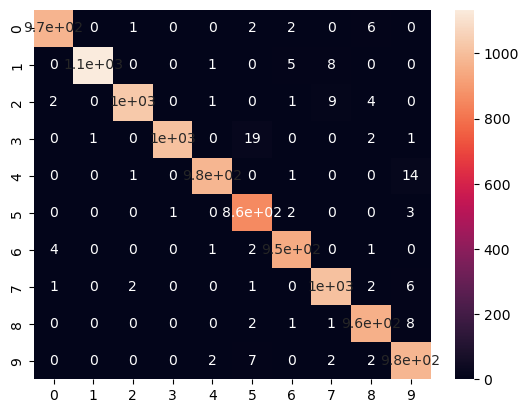

In [68]:
import seaborn as sns
sns.heatmap(cm, annot=True)

Examinando los errores. Podemos rastrear las posiciones del índice de las predicciones "perdidas" y extraer la imagen y la etiqueta correspondientes.

In [100]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Muestra el número de equivocaciones
len(misses)

132

In [114]:
# Muestra los primeros 10 errores
misses[:10]

array([ 167,  247,  320,  340,  359,  448,  460,  471,  495,  582],
      dtype=int64)

In [115]:
# Configura un iterador para alimentar filas por lotes
r = 12   # número de ileras
row = iter(np.array_split(misses,len(misses)//r+1))

Index: [ 167  247  320  340  359  448  460  471  495  582  659]
Label: [   5    4    9    5    9    9    5    9    8    8    2]
Guess: [   3    2    8    3    4    8    9    7    0    2    7]


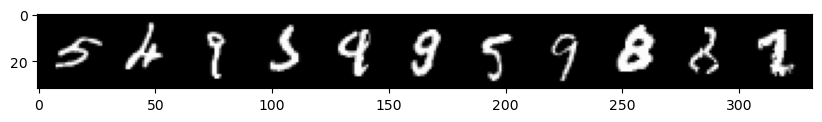

In [116]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Corriendo una imagen atravéz del modelo, también podemos pasar una sola imagen a través del modelo para obtener una predicción.

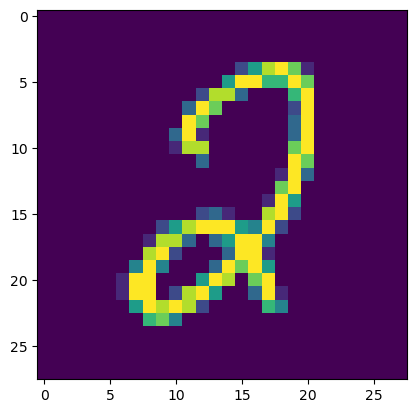

In [117]:
plt.imshow(test_data[4899][0].reshape(28,28))

In [118]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[4899][0].view(1,1,28,28))

In [119]:
new_prediction.argmax()

tensor(2)

Conclusión:

Atravéz de Pytorch se evaluó un modelo, de imagenes de números, se probó y nos damos cuenta que aunque la exactitud es muy buen, resulta que sí hay un error notable entre el modelo y la realidad, sí hay datos que una persona no tendría problemas en identificar, pero también hay datos que podrían confundir a una persona. La exactitud de los datos o la calidad de datos de entrenamiento, juega un papel principal en el desempeño de los redes convolucionales, pero nos damos cuenta que una red ANN es más robusta y menos inexacta que una red CNN.  